In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Or using Windows-1252 encoding
data = pd.read_csv("C:/Users/HP/Downloads/sales_data_sample.csv", encoding='windows-1252')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
data.shape

(2823, 25)

In [9]:
data = data[['QUANTITYORDERED', 'ORDERLINENUMBER']]

In [10]:
new_data = data.dropna(axis = 0)
from sklearn.cluster import KMeans

In [11]:
import seaborn as sns

In [12]:
wcss = []

for i in range (1, 11):
    clustering = KMeans(n_clusters = i, init = 'k-means++', random_state=42 )
    clustering.fit(data)
    wcss.append(clustering.inertia_)

<Axes: >

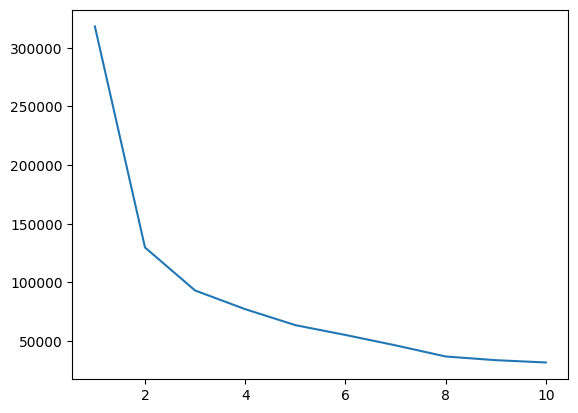

In [13]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

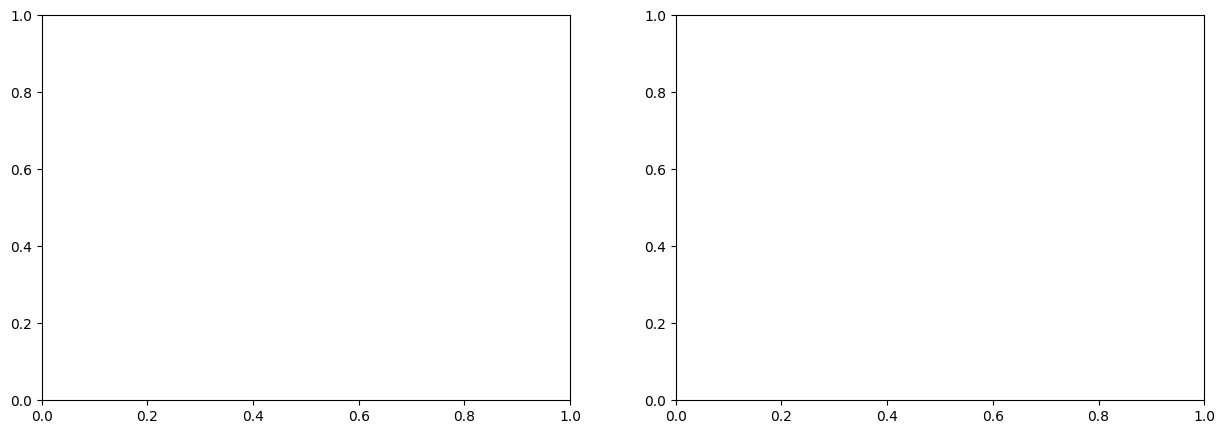

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

In [15]:
sns.scatterplot(ax = axes[0], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER').set_title('without clustering')

Text(0.5, 1.0, 'without clustering')

In [16]:
sns.scatterplot(ax = axes[1], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering.labels_).set_title('Using Elbow Clustering Method')


Text(0.5, 1.0, 'Using Elbow Clustering Method')

In [17]:
new_data.describe().T
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
scaled = ss.fit_transform(new_data,)

In [20]:
wcss_sc = []
for i in range(1, 11):
    clustering_sc = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)

<Axes: >

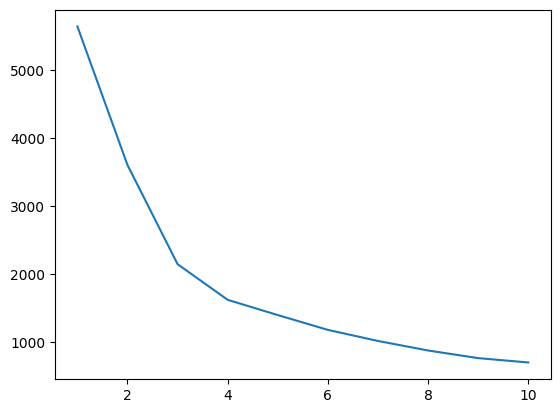

In [21]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc)

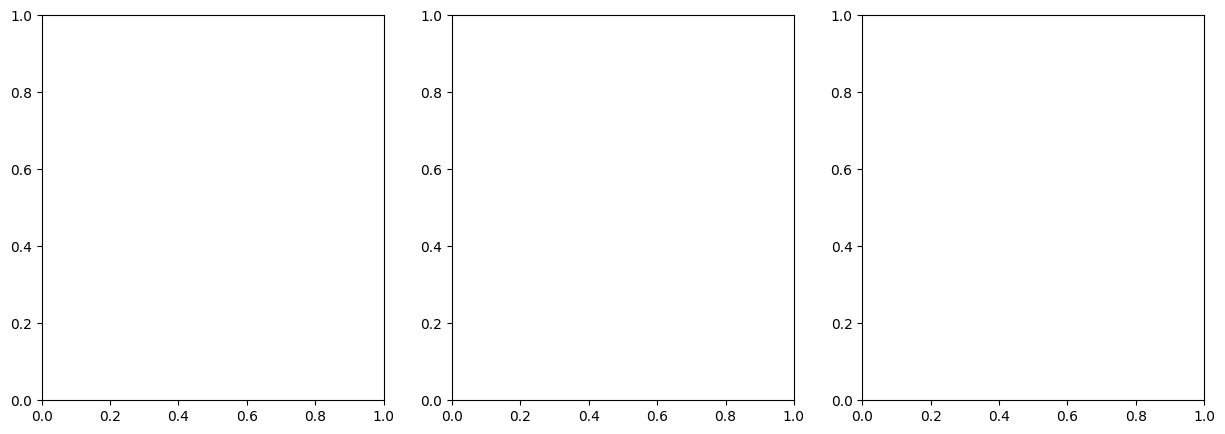

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

In [23]:
sns.scatterplot(ax = axes[0], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER').set_title('without clustering')

Text(0.5, 1.0, 'without clustering')

In [24]:
sns.scatterplot(ax = axes[2], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering.labels_).set_title('Using Elbow Clustering Method')

Text(0.5, 1.0, 'Using Elbow Clustering Method')

In [25]:
sns.scatterplot(ax = axes[1], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering_sc.labels_).set_title('Using Elbow Clustering Method & Scaled Data')


Text(0.5, 1.0, 'Using Elbow Clustering Method & Scaled Data')